# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [145]:
# import necessary libraries to load data from the database
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

def load_data(sqlite_path):
    engine = create_engine(sqlite_path)
    df = pd.read_sql_table('response_table',con=engine)
    X = df.loc[:,'message'].values
    Y = df.iloc[:,4:]
    
    return df, X, Y

In [146]:
sqlite_path = 'sqlite:///DisasterResponse.db'
X,Y = load_data(sqlite_path)

### 2. Write a tokenization function to process your text data

Lookup a complicated text to work on
- create a dictionary keeping all urls
- look up a complicated text
- test our code on this text

In [83]:
# import necessary libraries
import re
from sqlalchemy import create_engine
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download(['punkt', 'words', 'stopwords', 'averaged_perceptron_tagger', 'wordnet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
def tokenize(text):
    """
    Input: 
    a text string found in each reccord (str)
    Output:
    a list of stems 
    
    Desscription:
    Function that cterates stems - word tokens
    1. replaces urls with the 'url' string
    2. replaces punctuation marks with white spaces
    3. creates lists of words out of the initial text
    4. assigns Parts of speech to every word
    5. reduces words to their root form by specifying verb parts of speech
    6. reduces words to their stems - not necessary words to be understood by humans
    
    
    """
    # regex pattern to identify an url
    url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    # replace urls with a 'url' string
    text = re.sub(url_regex, 'url', text)
    # text normalization - remove punctuation and lower case
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    # tokenize text to words
    words = [w for w in word_tokenize(text) if w not in stopwords.words("english")]
    # assign "Parts of Speech": POS to every word - words output is a tupple
    words = pos_tag(words)
    # Reduce words to their root form by specifying Part of Speech: verb
    lemmed = [WordNetLemmatizer().lemmatize(w[0], pos = 'v') for w in words]
    # Reduce words to their stems - that is their root form not exactly a word to be understood 
    stemmed = [PorterStemmer().stem(w) for w in lemmed]
    
    return stemmed

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [50]:
#import necessary libraries
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer

In [51]:
pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer = tokenize)),
        ('tfidf', TfidfTransformer()),
        ('clf', RandomForestClassifier())
    ])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.9)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [53]:
import time
start = time.time()/60
# train classifier
pipeline.fit(X_train, y_train)
stop = time.time()/60
print(f"Model calculation time: {round(stop - start)} minutes") 

Model calculation time: 2.721339486539364


### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [64]:
start = time.time()/60
y_pred = pipeline.predict(X_test)
stop = time.time()/60
print(f"Predicting time: {stop - start}")

Predicting time: 0.6064376123249531


In [65]:
from matplotlib import pyplot as plt

In [162]:
len(y_pred[3])

34

In [156]:
def display_results(y_test, y_pred, *cvs):
    '''
    input:
    '''
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
    #plt.matshow(confusion_mat)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)
    for cv in cvs:
        print("\nBest Parameters:", cv)

In [157]:
display_results(y_test, y_pred)

Labels: [ 0.  1.]
Confusion Matrix:
 [[11779     0  1797     2     0     7     0     0   507    61]
 [   55     0    42     0     0     0     0     0     5     0]
 [ 3252     0  1902     1     1     2     0     0   886    19]
 [  182     0    30     0     0     1     0     0   109     0]
 [  124     0    13     0     1     1     0     0    53     0]
 [  108     0    18     0     0     2     0     0    62     0]
 [   53     0    11     0     0     0     0     0    23     0]
 [    2     0     0     0     0     0     0     0     0     0]
 [  856     0   150     0     2     0     0     0  1125     5]
 [  146     0    19     0     0     0     0     0    12     0]]
Accuracy: request                   0.877102
offer                     0.995646
aid_related               0.700333
medical_help              0.920260
medical_products          0.949372
search_and_rescue         0.972723
security                  0.981516
military                  0.967387
water                     0.948775
food   

### 6. Improve your model
Use grid search to find better parameters. 

In [59]:
[key for key in pipeline.get_params().keys()]

['memory',
 'steps',
 'vect',
 'tfidf',
 'clf',
 'vect__analyzer',
 'vect__binary',
 'vect__decode_error',
 'vect__dtype',
 'vect__encoding',
 'vect__input',
 'vect__lowercase',
 'vect__max_df',
 'vect__max_features',
 'vect__min_df',
 'vect__ngram_range',
 'vect__preprocessor',
 'vect__stop_words',
 'vect__strip_accents',
 'vect__token_pattern',
 'vect__tokenizer',
 'vect__vocabulary',
 'tfidf__norm',
 'tfidf__smooth_idf',
 'tfidf__sublinear_tf',
 'tfidf__use_idf',
 'clf__bootstrap',
 'clf__class_weight',
 'clf__criterion',
 'clf__max_depth',
 'clf__max_features',
 'clf__max_leaf_nodes',
 'clf__min_impurity_decrease',
 'clf__min_impurity_split',
 'clf__min_samples_leaf',
 'clf__min_samples_split',
 'clf__min_weight_fraction_leaf',
 'clf__n_estimators',
 'clf__n_jobs',
 'clf__oob_score',
 'clf__random_state',
 'clf__verbose',
 'clf__warm_start']

In [18]:
def build_model():
    pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer = tokenize)),
        ('tfidf', TfidfTransformer()),
        ('clf', RandomForestClassifier())
    ])

    parameters = {'clf__criterion': ['gini', 'entropy']}

    cv = GridSearchCV(pipeline, param_grid=parameters)

    return cv

In [19]:
import time
start = time.time()/60

model = build_model()
model.fit(X_train, y_train)
stop = time.time()/60
print(f"Model calculation time: {stop - start}") 

Model calculation time: 28.677942164242268


In [127]:
def build_model():
    pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer = tokenize)),
        ('tfidf', TfidfTransformer()),
        ('clf', RandomForestClassifier())
    ])

    parameters = {'clf__min_samples_split': [2, 5, 10]}

    cv = GridSearchCV(pipeline, param_grid=parameters)

    return cv

In [128]:
import time
start = time.time()/60

model = build_model()
model.fit(X_train, y_train)
stop = time.time()/60
print(f"Model calculation time: {stop - start}") 

Model calculation time: 4.891336899250746


In [73]:
import time
start = time.time()/60

model = build_model()
model.fit(X_train, y_train)
stop = time.time()/60
print(f"Model calculation time: {stop - start}") 

Model calculation time: 40.24700428545475


### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [184]:
def display_results(cv, y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)
    print("\nBest Parameters:", cv.best_params_)

In [207]:
y_pred == y_test

,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,food,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
8033,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
20418,True,True,False,True,True,True,True,True,True,True,...,True,False,False,False,False,True,True,True,False,True
2654,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
18870,True,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8445,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
21812,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
3333,False,True,True,True,True,True,True,True,False,False,...,True,True,True,True,True,True,True,True,True,False
10277,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
21667,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,True,True,True,False,True
5093,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [209]:
(y_pred == y_test).mean()

request                   0.877102
offer                     0.995646
aid_related               0.700333
medical_help              0.920260
medical_products          0.949372
search_and_rescue         0.972723
security                  0.981516
military                  0.967387
water                     0.948775
food                      0.916033
shelter                   0.920473
clothing                  0.983992
money                     0.976735
missing_people            0.988602
refugees                  0.966319
death                     0.954111
other_aid                 0.869974
infrastructure_related    0.934517
transport                 0.954068
buildings                 0.949074
electricity               0.979681
tools                     0.993938
hospitals                 0.989029
shops                     0.995176
aid_centers               0.987919
other_infrastructure      0.956288
weather_related           0.821737
floods                    0.929139
storm               

In [204]:
(y_pred == y_test).mean()

request                   0.877102
offer                     0.995646
aid_related               0.700333
medical_help              0.920260
medical_products          0.949372
search_and_rescue         0.972723
security                  0.981516
military                  0.967387
water                     0.948775
food                      0.916033
shelter                   0.920473
clothing                  0.983992
money                     0.976735
missing_people            0.988602
refugees                  0.966319
death                     0.954111
other_aid                 0.869974
infrastructure_related    0.934517
transport                 0.954068
buildings                 0.949074
electricity               0.979681
tools                     0.993938
hospitals                 0.989029
shops                     0.995176
aid_centers               0.987919
other_infrastructure      0.956288
weather_related           0.821737
floods                    0.929139
storm               

In [168]:
y_test.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [170]:
y_pred

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [182]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix

ImportError: cannot import name 'multilabel_confusion_matrix'

In [201]:
def display_results(y_test, y_pred, *cvs):
    accuracy = (y_pred == y_test).mean()
    print(accuracy)
    for cv in cvs:
        print("\nBest Parameters:", cv)

In [132]:
y_pred = model.predict(X_test)

In [203]:
display_results(y_test, y_pred, model)

request                   0.877102
offer                     0.995646
aid_related               0.700333
medical_help              0.920260
medical_products          0.949372
search_and_rescue         0.972723
security                  0.981516
military                  0.967387
water                     0.948775
food                      0.916033
shelter                   0.920473
clothing                  0.983992
money                     0.976735
missing_people            0.988602
refugees                  0.966319
death                     0.954111
other_aid                 0.869974
infrastructure_related    0.934517
transport                 0.954068
buildings                 0.949074
electricity               0.979681
tools                     0.993938
hospitals                 0.989029
shops                     0.995176
aid_centers               0.987919
other_infrastructure      0.956288
weather_related           0.821737
floods                    0.929139
storm               

Labels: [ 0.  1.]
Confusion Matrix:
 [[2641    0  348    0    2    1    0    0  123   14]
 [  10    0   10    0    0    0    0    0    0    0]
 [ 662    0  505    1    2    1    0    0  177    1]
 [  36    0    6    0    1    0    0    0   30    0]
 [  17    0    8    0    4    1    0    0   15    0]
 [  19    0    6    0    0    1    0    0   12    0]
 [  15    0    1    0    0    0    0    0    5    0]
 [   1    0    1    0    0    0    0    0    0    0]
 [ 162    0   35    1    0    0    0    0  289    0]
 [  39    0    0    0    0    0    0    0    3    0]]
Accuracy: request                   0.879754
offer                     0.996158
aid_related               0.719362
medical_help              0.921245
medical_products          0.948713
search_and_rescue         0.972148
security                  0.982520
military                  0.965425
water                     0.945063
food                      0.924126
shelter                   0.930849
clothing                  0.984249
mo

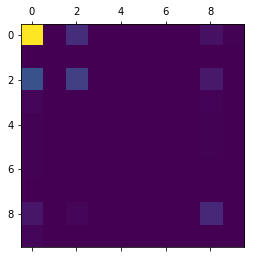

In [23]:
y_pred = model.predict(X_test)
    
display_results(model, y_test, y_pred)

Labels: [ 0.  1.]
Confusion Matrix:
 [[2641    0  355    0    1    1    0    0  129    6]
 [  13    0   16    0    0    0    0    0    1    0]
 [ 637    0  470    0    2    1    1    0  197    4]
 [  38    0   12    0    0    0    0    0   31    0]
 [  29    0    3    0    3    0    0    0   13    0]
 [  14    0    7    0    0    4    0    0   10    0]
 [  17    0    1    0    0    0    0    0    9    1]
 [   1    0    0    0    0    0    0    0    0    0]
 [ 157    0   33    0    0    1    0    0  313    2]
 [  25    0    4    0    0    0    0    0    3    0]]
Accuracy: request                   0.882443
offer                     0.994237
aid_related               0.723204
medical_help              0.924894
medical_products          0.954860
search_and_rescue         0.974645
security                  0.981368
military                  0.969842
water                     0.942950
food                      0.929120
shelter                   0.931041
clothing                  0.987706
mo

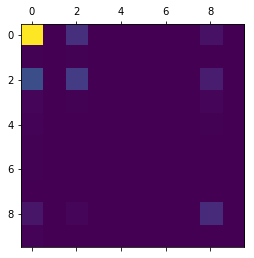

In [75]:
y_pred = model.predict(X_test)
    
display_results(model, y_test, y_pred)

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [84]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multioutput import MultiOutputClassifier

In [85]:
pipeline_ada = Pipeline([
        ('features', FeatureUnion([

            ('text_pipeline', Pipeline([
                ('count_vectorizer', CountVectorizer(tokenizer=tokenize)),
                ('tfidf_transformer', TfidfTransformer())
            ]))
            
        ])),

        ('classifier', MultiOutputClassifier(AdaBoostClassifier()))
    ])

In [86]:
import time
start = time.time()/60

pipeline_ada.fit(X_train, y_train)
stop = time.time()/60
print(f"Model calculation time: {stop - start}") 

Model calculation time: 4.221629615873098


In [89]:
[key for key in pipeline_ada.get_params().keys()]

['memory',
 'steps',
 'features',
 'classifier',
 'features__n_jobs',
 'features__transformer_list',
 'features__transformer_weights',
 'features__text_pipeline',
 'features__text_pipeline__memory',
 'features__text_pipeline__steps',
 'features__text_pipeline__count_vectorizer',
 'features__text_pipeline__tfidf_transformer',
 'features__text_pipeline__count_vectorizer__analyzer',
 'features__text_pipeline__count_vectorizer__binary',
 'features__text_pipeline__count_vectorizer__decode_error',
 'features__text_pipeline__count_vectorizer__dtype',
 'features__text_pipeline__count_vectorizer__encoding',
 'features__text_pipeline__count_vectorizer__input',
 'features__text_pipeline__count_vectorizer__lowercase',
 'features__text_pipeline__count_vectorizer__max_df',
 'features__text_pipeline__count_vectorizer__max_features',
 'features__text_pipeline__count_vectorizer__min_df',
 'features__text_pipeline__count_vectorizer__ngram_range',
 'features__text_pipeline__count_vectorizer__preprocessor

In [98]:
y_pred = pipeline_ada.predict(X_test)

Labels: [0 1]
Confusion Matrix:
 [[2304    2  500 ...,    0    7   20]
 [   7    0   19 ...,    0    0    0]
 [ 324    5  673 ...,    2    4    4]
 ..., 
 [   0    0    0 ...,    0    0    0]
 [   0    0    0 ...,    0    0    0]
 [  19    0    6 ...,    0    0    0]]
Accuracy: request                   0.886477
offer                     0.992701
aid_related               0.754130
medical_help              0.930273
medical_products          0.959470
search_and_rescue         0.977334
security                  0.979831
military                  0.971379
water                     0.961583
food                      0.950250
shelter                   0.945448
clothing                  0.990396
money                     0.978486
missing_people            0.989243
refugees                  0.968114
death                     0.962543
other_aid                 0.864771
infrastructure_related    0.933154
transport                 0.962927
buildings                 0.958894
electricity          

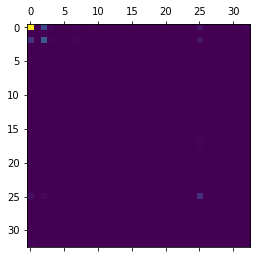

In [109]:
display_results(y_test, y_pred)

In [91]:
pipeline_ada.get_params().get('classifier__estimator__learning_rate')

1.0

In [110]:
def improved_model():
    pipeline = Pipeline([
        ('features', FeatureUnion([

            ('text_pipeline', Pipeline([
                ('count_vectorizer', CountVectorizer(tokenizer=tokenize)),
                ('tfidf_transformer', TfidfTransformer())
            ]))
            
        ])),

        ('classifier', MultiOutputClassifier(AdaBoostClassifier()))
    ])
    
    parameters = {'classifier__estimator__learning_rate': [0.8, 1, 1.2]}
    
    cv = GridSearchCV(pipeline, param_grid=parameters)

    return cv

In [111]:
import time
start = time.time()/60

improved_model = improved_model()
improved_model.fit(X_train, y_train)
stop = time.time()/60
print(f"Model calculation time: {stop - start}") 

Model calculation time: 52.205791883170605


In [112]:
y_pred = improved_model.predict(X_test)

In [118]:
improved_model

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('text_pipeline', Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase...mator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
           n_jobs=1))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'classifier__estimator__learning_rate': [0.8, 1, 1.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Labels: [0 1]
Confusion Matrix:
 [[2352    1  508 ...,    0    2    8]
 [   9    0   20 ...,    0    0    0]
 [ 354    1  655 ...,    0    0    3]
 ..., 
 [   0    0    0 ...,    0    0    0]
 [   0    0    0 ...,    0    0    0]
 [  19    0    5 ...,    0    0    0]]
Accuracy: request                   0.884172
offer                     0.993853
aid_related               0.751249
medical_help              0.929889
medical_products          0.957741
search_and_rescue         0.977142
security                  0.980983
military                  0.972532
water                     0.960622
food                      0.953707
shelter                   0.946024
clothing                  0.991164
money                     0.980599
missing_people            0.988667
refugees                  0.969266
death                     0.963504
other_aid                 0.863619
infrastructure_related    0.934691
transport                 0.963888
buildings                 0.957933
electricity          

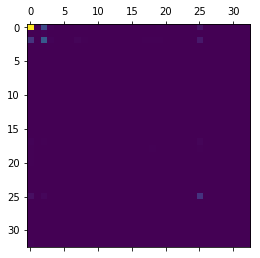

In [125]:
from matplotlib import pyplot as plt
display_results(y_test, y_pred, improved_model)

In [14]:
y_pred = improved_model.predict(X_test)

In [18]:
from matplotlib import pyplot as plt
display_results(improved_model, y_test, y_pred)

Labels: [0 1]
Confusion Matrix:
 [[2371    4  410 ...,    1    3   30]
 [   8    1   13 ...,    0    0    0]
 [ 323    7  697 ...,    0    5    0]
 ..., 
 [   0    0    0 ...,    0    0    0]
 [   0    0    0 ...,    0    0    0]
 [  25    0   10 ...,    1    0    0]]
Accuracy: request                   0.892624
offer                     0.992701
aid_related               0.765079
medical_help              0.927584
medical_products          0.954668
search_and_rescue         0.971187
security                  0.979831
military                  0.969842
water                     0.964080
food                      0.945640
shelter                   0.944295
clothing                  0.988283
money                     0.980791
missing_people            0.986170
refugees                  0.969650
death                     0.967345
other_aid                 0.862658
infrastructure_related    0.925279
transport                 0.954860
buildings                 0.956396
electricity          

### 9. Export your model as a pickle file

In [19]:
model_filepath = 'classifier'

In [21]:
import pickle
with open(model_filepath, 'wb') as f:
        pickle.dump(improved_model, f)

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.

In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

import re
from sqlalchemy import create_engine
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download(['punkt', 'words', 'stopwords', 'averaged_perceptron_tagger', 'wordnet'])

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import AdaBoostClassifier
from sklearn.multioutput import MultiOutputClassifier

import pickle
import time

from matplotlib import pyplot as plt

def load_data(sqlite_path):
    engine = create_engine(sqlite_path)
    df = pd.read_sql_table('response_table',con=engine)
    X = df.loc[:,'message'].values
    Y = df.iloc[:,4:]
    
    return X, Y


def tokenize(text):
    """
    Input: 
    a text string found in each reccord (str)
    Output:
    a list of stems 
    
    Desscription:
    Function that cterates stems - word tokens
    1. replaces urls with the 'url' string
    2. replaces punctuation marks with white spaces
    3. creates lists of words out of the initial text
    4. assigns Parts of speech to every word
    5. reduces words to their root form by specifying verb parts of speech
    6. reduces words to their stems - not necessary words to be understood by humans
    
    
    """
    # regex pattern to identify an url
    url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    # replace urls with a 'url' string
    text = re.sub(url_regex, 'url', text)
    # text normalization - remove punctuation and lower case
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    # tokenize text to words
    words = [w for w in word_tokenize(text) if w not in stopwords.words("english")]
    # assign "Parts of Speech": POS to every word - words output is a tupple
    words = pos_tag(words)
    # Reduce words to their root form by specifying Part of Speech: verb
    lemmed = [WordNetLemmatizer().lemmatize(w[0], pos = 'v') for w in words]
    # Reduce words to their stems - that is their root form not exactly a word to be understood 
    stemmed = [PorterStemmer().stem(w) for w in lemmed]
    
    return stemmed

def build_model():
    """
    Input:
    tokenizer function to feed the CountVectorizer Instantce
    
    Output:
    A cross validated pipeline based on the 
    """
    pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer = tokenize)),
        ('tfidf', TfidfTransformer()),
        ('clf', RandomForestClassifier())
    ])

    parameters = {'clf__min_samples_split': [2, 3]}

    cv = GridSearchCV(pipeline, param_grid=parameters)

    return cv

def display_results(cv, y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
    plt.matshow(confusion_mat)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)
    print("\nBest Parameters:", cv.best_params_)

    



start = time.time()/60
improved_model = improved_model()
improved_model.fit(X_train, y_train)
stop = time.time()/60
print(f"Model calculation time: {stop - start}") 



Notes

In [ ]:
# import libraries
import pandas as pd
import re
from sqlalchemy import create_engine

In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///DisasterResponse.db')
df = pd.read_sql_table('response_table',con=engine)

In [ ]:
# load data from database
engine = create_engine('sqlite:///DisasterResponse.db')
df = pd.read_sql_table('response_table',con=engine)
X = df.loc[:,'message'].values
Y = df.iloc[:,4:]

In [ ]:
# regex pattern to identify an url
url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

# a dictionaly comprehension keeping all indexes and urls in case we wishesd to furtehr process later
urls_dict = \
{df[df.message==text].index[0]:re.findall(url_regex, text) for text in df.message if len(re.findall(url_regex, text))>1}

In [ ]:
# lookup check out a complicated text to work on
text = df.message[12409]
text

In [ ]:
# we use the above mentioned text to get the index od the data frame, which will later help us identify urls 
# and where these are located in the dataframe - their index
df[df.message == 'Wind 16.0 mph NNE. Barometer 982.09 mb, gust 31.0, Temp 56.9 &amp;deg;F. Rain 0.00 in. Humidity 95% hurricane cam http://t.co/Sq2ekENuWind 16.0 mph NNE. Barometer 981.68 mb, gust 26.0, Temp 57.1 &amp;deg;F. Rain 0.00 in. Humidity 95% hurricane cam http://t.co/Sq2ekENu'].index

In [ ]:
# Index in pandas is basic object storing axis labels for all pandas objects - we need the index value
type(df[df.message == 'Wind 16.0 mph NNE. Barometer 982.09 mb, gust 31.0, Temp 56.9 &amp;deg;F. Rain 0.00 in. Humidity 95% hurricane cam http://t.co/Sq2ekENuWind 16.0 mph NNE. Barometer 981.68 mb, gust 26.0, Temp 57.1 &amp;deg;F. Rain 0.00 in. Humidity 95% hurricane cam http://t.co/Sq2ekENu'].index[0])

In [ ]:
# replace all url found in each text with the string "url"
text = re.sub(url_regex, 'url', text)
text

In [ ]:
# normalize with lower case
text = text.lower()
text

In [ ]:
# remove punctuation
text = re.sub(r"[^a-zA-Z0-9]", " ", text)
text

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
nltk.download(['punkt', 'words', 'stopwords', 'averaged_perceptron_tagger'])

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words("english"))

In [ ]:
# remove stopwords
words = [w for w in word_tokenize(text) if w not in stopwords.words("english")]
words

In [ ]:
# import "Parts of Speech": POS and Name Entity Recognition NER
from nltk import pos_tag, ne_chunk
words = pos_tag(words)
words

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w[0], pos = 'v') for w in words]
lemmed

In [ ]:
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in lemmed]
stemmed

In [ ]:
# credit to https://github.com/iris-theof/Disaster_response_pipeline
def tokenize(text):
    '''
    Function that splits text into words and return the root form of the words
    after removing the stop words
    
    Input: text(str): the message
    Output: lemm(list of str): a list of the root form of the message words
    '''
    #Regex to find urls
    url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    
    # Finds all urls from the provided text
    detected_urls = re.findall(url_regex, text)
    
    #Replaces all urls found with the "urlplaceholder"
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")
        
    # Normalize text
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())    
        
    # Extracts the word tokens from the provided text    
    tokens = word_tokenize(text)
      
    # Remove stop words
    stop = stopwords.words("english")
    words = [t for t in tokens if t not in stop]
    
    #Lemmanitizer to remove inflectional and derivationally related forms of a word
    lemmatizer = WordNetLemmatizer()

    # Makes a list of clean tokens
    clean_tokens = []
    for tok in words:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens


In [ ]:
import re
from sqlalchemy import create_engine
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download(['punkt', 'words', 'stopwords', 'averaged_perceptron_tagger', 'wordnet'])
def tokenize(text):
    """
    Input: 
    a text string found in each reccord (str)
    Output:
    a list of stems 
    
    Desscription:
    Function that cterates stems - word tokens
    1. replaces urls with the 'url' string
    2. replaces punctuation marks with white spaces
    3. creates lists of words out of the initial text
    4. assigns Parts of speech to every word
    5. reduces words to their root form by specifying verb parts of speech
    6. reduces words to their stems - not necessary words to be understood by humans
    
    
    """
    # regex pattern to identify an url
    url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    # replace urls with a 'url' string
    text = re.sub(url_regex, 'url', text)
    # text normalization - remove punctuation and lower case
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    # tokenize text to words
    words = [w for w in word_tokenize(text) if w not in stopwords.words("english")]
    # assign "Parts of Speech": POS to every word - words output is a tupple
    words = pos_tag(words)
    # Reduce words to their root form by specifying Part of Speech: verb
    lemmed = [WordNetLemmatizer().lemmatize(w[0], pos = 'v') for w in words]
    # Reduce words to their stems - that is their root form not exactly a word to be understood 
    stemmed = [PorterStemmer().stem(w) for w in lemmed]
    
    return stemmed

In [ ]:
text = df.message[12409]
text

In [ ]:
text = tokenize(text)
text

 `CountVectorizer` (Bag of Words)

In [ ]:
# Instantiate transformers and classifier
vect = CountVectorizer(tokenizer=tokenize)
tfidf = TfidfTransformer()
clf = RandomForestClassifier()

# Fit and/or transform each to the data
X_train_counts = vect.fit_transform(X_train)
X_train_tfidf = tfidf.fit_transform(X_train_counts)
clf.fit(X_train_tfidf, Y_train)

In [ ]:
# convert sparse matrix to numpy array to view
X_train_counts.toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# initialize tf-idf vectorizer object
vectorizer = TfidfVectorizer()

In [ ]:
X_test_vect = vectorizer.fit_transform(X_test)

In [ ]:
# Transform test data
X_test_counts = vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)

# Predict test labels
y_pred = clf.predict(X_test_tfidf)

`TfidfTransformer`

In [ ]:
# initialize tf-idf transformer object
transformer = TfidfTransformer(smooth_idf=False)

In [ ]:
# use counts from count vectorizer results to compute tf-idf values
tfidf = transformer.fit_transform(X_count)

In [ ]:
# convert sparse matrix to numpy array to view
tfidf.toarray()

`TfidfVectorizer` = `CountVectorizer` + `TfidfTransformer`

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# initialize tf-idf vectorizer object
vectorizer = TfidfVectorizer()

In [ ]:
# compute bag of word counts and tf-idf values
X_vect = vectorizer.fit_transform(X_train)

In [ ]:
# convert sparse matrix to numpy array to view
X_vect.toarray()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_vect, Y_train)

In [ ]:
pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer = tokenize)),
        ('tfidf', TfidfTransformer()),
        ('clf', MultiOutputClassifier(GradientBoostingClassifier(max_depth=6)))
    ])

In [ ]:
# choose parameters
parameters = {'clf__estimator__n_estimators': [100, 140]}

    # create grid search object
model = GridSearchCV(pipeline, param_grid=parameters, scoring='recall_micro', cv=4)

In [29]:
from sklearn.base import BaseEstimator,TransformerMixin

# Build a custom transformer which will extract the starting verb of a sentence
class StartingVerbExtractor(BaseEstimator, TransformerMixin):
    """
    Starting Verb Extractor class
    
    This class extract the starting verb of a sentence,
    creating a new feature for the ML classifier
    """

    def starting_verb(self, text):
        sentence_list = nltk.sent_tokenize(text)
        for sentence in sentence_list:
            pos_tags = nltk.pos_tag(tokenize(sentence))
            first_word, first_tag = pos_tags[0]
            if first_tag in ['VB', 'VBP'] or first_word == 'RT':
                return True
        return False

    # Given it is a tranformer we can return the self 
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_tagged = pd.Series(X).apply(self.starting_verb)
        return pd.DataFrame(X_tagged)